In [ ]:
from tensorflow import keras
keras.__version__

'2.12.0'

In [ ]:
from keras.layers import Embedding
from keras.datasets import imdb
from keras import preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
from keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.optimizers import RMSprop
from keras.optimizers import adam

In [ ]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

In [ ]:

# Considering only top 10,000 Words
max_features = 10000

# Setting a Cut-Off Point for Reviews after 150 Words
maxlen = 150

# Loading the Train and Test Datasets of the IMDB Example
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pre-Processing to Convert the Texts to Numericals
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
     
     

In [ ]:
model1 = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model1.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model1.add(Flatten())

# We add the classifier on top
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="model1.keras",
        save_best_only=True,
        monitor="val_loss")
]
# Model Fit - Running the Model
model_1 = model1.fit(x_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=callbacks)
     

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
625/625 [==============================] - 3s 3ms/step - loss: 0.5920 - acc: 0.6999 - val_loss: 0.4186 - val_acc: 0.8348
Epoch 2/30
625/625 [==============================] - 3s 4ms/step - loss: 0.3304 - acc: 0.8658 - val_loss: 0.3200 - val_acc: 0.8662
Epoch 3/30
625/625 [==============================

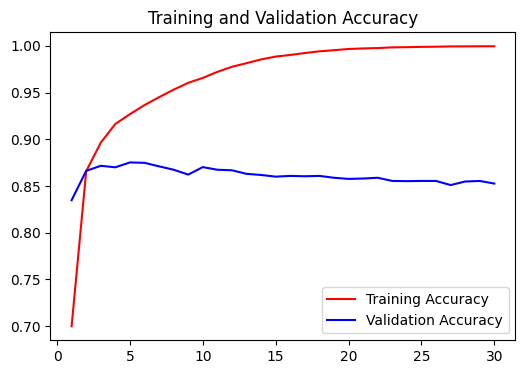

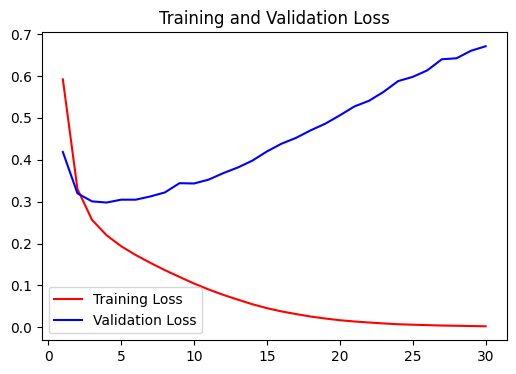

In [ ]:
accuracy = model_1.history['acc']
val_accuracy = model_1.history['val_acc']

loss = model_1.history["loss"]
val_loss = model_1.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="red", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="red", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('model1.keras')
Model1_Results = test_model.evaluate(x_test,y_test)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

782/782 [==============================] - 2s 2ms/step - loss: 0.2928 - acc: 0.8760
Loss: 0.293
Accuracy: 0.876


#**Model 2: Embedding layers**

**_Training samples- 100, Validation samples- 10000, Test samples- 5000_**



In [ ]:


# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=100, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

In [ ]:
# Setting the Sequential Layer for Model Building
model = Sequential()

# Adding the Embedding Layer with limiting to consider only the top 10,000 Words
model.add(Embedding(10000, 8, input_length=maxlen))

# Flattening the Size 
model.add(Flatten())

# Adding the Classifer on the top - As the final layer
model.add(Dense(1, activation = 'sigmoid'))

# Compiling the Model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
     
model.summary()    

# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model2.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
Model_2 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels), 
                    callbacks=callbacks)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_6 (Flatten)         (None, 1200)              0         
                                                                 
 dense_7 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
4/4 [==============================] - 1s 275ms/step - loss: 0.6935 - acc: 0.4600 - val_loss: 0.6931 - val_acc: 0.5009
Epoch 2/30
4/4 [==============================] - 0s 150ms/step - loss: 0.6708 - acc: 0.8300 - val_loss: 0.6931 - val_acc: 0.5009
Epoch 3/30
4/4 [==============================] - 0s 1

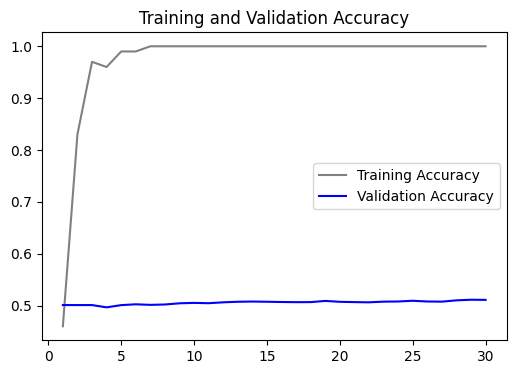

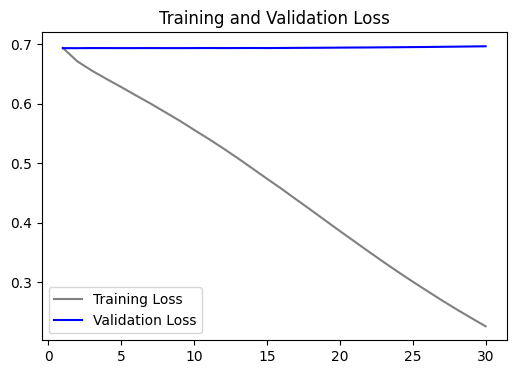

In [ ]:
accuracy = Model_2.history['acc']
val_accuracy = Model_2.history['val_acc']

loss = Model_2.history["loss"]
val_loss = Model_2.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()
     

In [ ]:
test_model = keras.models.load_model("model2.keras")
test_loss, test_acc = test_model.evaluate(test_texts, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

157/157 [==============================] - 1s 2ms/step - loss: 0.6929 - acc: 0.5058
Test accuracy: 0.506


# **Model 3: Embedding+ Conv1D layers+ Dropout**

**_Training Samples- 1000, Validation Samples- 10000, Test Samples- 5000_**

In [ ]:
# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=1000, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)
     

In [ ]:
# Setting the Sequential Layer for Model Building
model = Sequential()

# Adding the Embedding Layer with limiting to consider only the top 10,000 Words
maxlen = 150
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.8))
model.add(MaxPooling1D(3))

model.add(GlobalMaxPooling1D())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compiling the Model
model.compile(optimizer= 'adam' , loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 8)            80000     
                                                                 
 conv1d_9 (Conv1D)           (None, 148, 512)          12800     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 49, 512)          0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 47, 256)           393472    
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 15, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 13, 256)          

In [ ]:

# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model3.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
Model_3 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels), 
                    callbacks=callbacks)

Epoch 1/30
32/32 [==============================] - 9s 212ms/step - loss: 0.6947 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 6s 189ms/step - loss: 0.6935 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 5s 141ms/step - loss: 0.6931 - accuracy: 0.5120 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/30
32/32 [==============================] - 4s 127ms/step - loss: 0.6933 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5311
Epoch 5/30
32/32 [==============================] - 4s 116ms/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5184
Epoch 6/30
32/32 [==============================] - 4s 124ms/step - loss: 0.6929 - accuracy: 0.5100 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/30
32/32 [==============================] - 3s 84ms/step - loss: 0.6927 - accuracy: 0.5320 - val_loss: 0.6930 - val_accuracy: 0.5204
Epoch 8

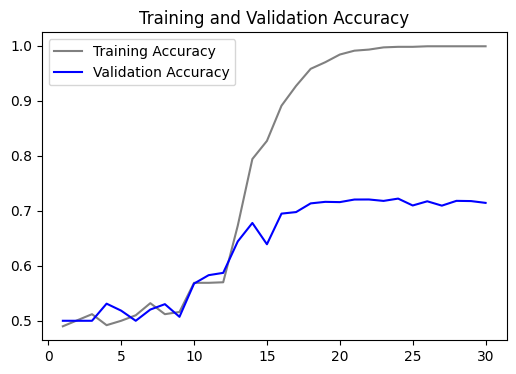

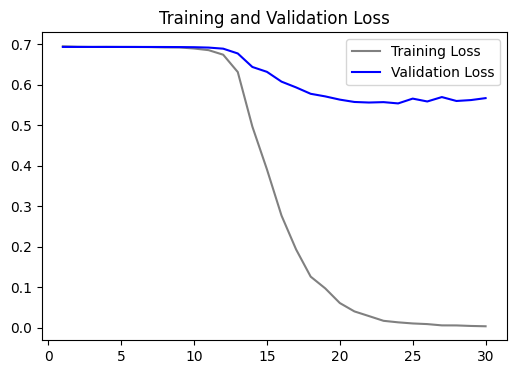

In [ ]:
accuracy = Model_3.history['accuracy']
val_accuracy = Model_3.history['val_accuracy']

loss = Model_3.history["loss"]
val_loss = Model_3.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()
     

In [ ]:
test_model = keras.models.load_model("model3.keras")
test_loss, test_acc = test_model.evaluate(test_texts, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

157/157 [==============================] - 1s 4ms/step - loss: 0.5401 - accuracy: 0.7314
Test accuracy: 0.731


# **Model 4- Embedding+ Conv1D+ Dropout** 

**_Training samples= 900 samples, Validation samples- 10000, Test samples- 5000_**

In [ ]:
# set the maximum number of words to be used in the vocabulary
num_words = 10000

# load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# truncate the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# combine the training and testing data to form the full dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# split the data into 100 training samples and 10000 validation samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=900, test_size=10000, random_state=42, stratify=labels)

# further split the data
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

# print the sizes of each subset
print("Number of training samples:", len(train_texts))
print("Number of validation samples:", len(val_texts))
print("Number of test samples:", len(texts) - len(train_texts) - len(val_texts))


Number of training samples: 900
Number of validation samples: 10000
Number of test samples: 39100


In [ ]:
# Setting the Sequential Layer for Model Building
model = Sequential()

# Adding the Embedding Layer with limiting to consider only the top 10,000 Words
maxlen = 150
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(3))

model.add(GlobalMaxPooling1D())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compiling the Model
model.compile(optimizer= 'adam' , loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model4.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
model4 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels), 
                    callbacks=callbacks)
     

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 8)            80000     
                                                                 
 conv1d_15 (Conv1D)          (None, 148, 512)          12800     
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 49, 512)          0         
 g1D)                                                            
                                                                 
 conv1d_16 (Conv1D)          (None, 47, 256)           393472    
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 15, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 13, 256)          

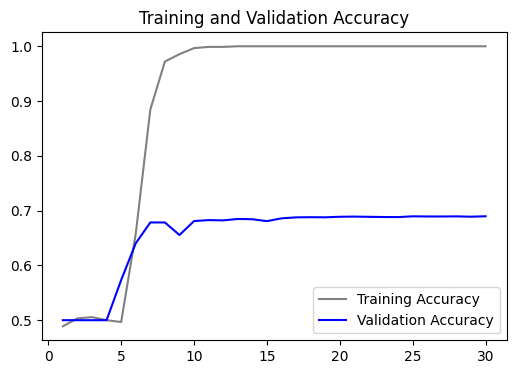

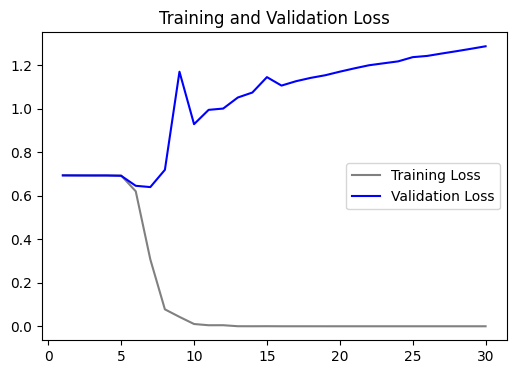

In [ ]:

accuracy = model4.history['accuracy']
val_accuracy = model4.history['val_accuracy']

loss = model4.history["loss"]
val_loss = model4.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("model4.keras")
test_loss, test_acc = test_model.evaluate(test_texts, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

157/157 [==============================] - 1s 4ms/step - loss: 0.6265 - accuracy: 0.6908
Test accuracy: 0.691


# **Model 5- Embedding+ Conv1D+ Dropout**

**_Training sample= 4000, Validation Samples- 10000, Test Samples- 5000_**

In [ ]:
# set the maximum number of words to be used in the vocabulary
num_words = 10000

# load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# truncate the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# combine the training and testing data to form the full dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# split the data into 100 training samples and 10000 validation samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=4000, test_size=10000, random_state=42, stratify=labels)

# further split the data
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

# print the sizes of each subset
print("Number of training samples:", len(train_texts))
print("Number of validation samples:", len(val_texts))
print("Number of test samples:", len(texts) - len(train_texts) - len(val_texts))


Number of training samples: 4000
Number of validation samples: 10000
Number of test samples: 36000


In [ ]:
# Setting the Sequential Layer for Model Building
model = Sequential()

# Adding the Embedding Layer with limiting to consider only the top 10,000 Words
maxlen = 150
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.8))
model.add(MaxPooling1D(3))

model.add(GlobalMaxPooling1D())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compiling the Model
model.compile(optimizer= 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 8)            80000     
                                                                 
 conv1d_18 (Conv1D)          (None, 148, 512)          12800     
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 49, 512)          0         
 g1D)                                                            
                                                                 
 conv1d_19 (Conv1D)          (None, 47, 256)           393472    
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 15, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_20 (Conv1D)          (None, 13, 256)          

In [ ]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model5.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
model_5 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels), 
                    callbacks=callbacks)

Epoch 1/30
125/125 [==============================] - 14s 94ms/step - loss: 0.6946 - accuracy: 0.5040 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/30
125/125 [==============================] - 8s 65ms/step - loss: 0.6940 - accuracy: 0.4995 - val_loss: 0.6926 - val_accuracy: 0.5183
Epoch 3/30
125/125 [==============================] - 5s 42ms/step - loss: 0.6622 - accuracy: 0.5928 - val_loss: 0.6338 - val_accuracy: 0.7066
Epoch 4/30
125/125 [==============================] - 5s 39ms/step - loss: 0.5080 - accuracy: 0.7540 - val_loss: 0.5663 - val_accuracy: 0.7656
Epoch 5/30
125/125 [==============================] - 6s 48ms/step - loss: 0.3735 - accuracy: 0.8353 - val_loss: 0.5076 - val_accuracy: 0.8017
Epoch 6/30
125/125 [==============================] - 7s 58ms/step - loss: 0.2665 - accuracy: 0.8863 - val_loss: 0.4754 - val_accuracy: 0.7964
Epoch 7/30
125/125 [==============================] - 4s 32ms/step - loss: 0.1945 - accuracy: 0.9227 - val_loss: 0.4827 - val_accuracy: 0.764

In [ ]:
accuracy = model_5.history['accuracy']
val_accuracy = model_5.history['val_accuracy']

loss = model_5.history["loss"]
val_loss = model_5.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="red", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="red", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("model5.keras")
test_loss, test_acc = test_model.evaluate(test_texts, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

157/157 [==============================] - 1s 5ms/step - loss: 0.4667 - acc: 0.7744
Test accuracy: 0.774


# **Model 6: Embedding+ Conv1D+ Dropout** 

**_Training Sample= 30000, Validation Samples- 10000, Test Samples- 5000_**

In [ ]:
from keras.datasets import imdb
from keras import preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split

# set the maximum number of words to be used in the vocabulary
num_words = 10000

# load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# truncate the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# combine the training and testing data to form the full dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# split the data into 100 training samples and 10000 validation samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=30000, test_size=10000, random_state=42, stratify=labels)

# further split the data
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

# print the sizes of each subset
print("Number of training samples:", len(train_texts))
print("Number of validation samples:", len(val_texts))
print("Number of test samples:", len(texts) - len(train_texts) - len(val_texts))


Number of training samples: 30000
Number of validation samples: 10000
Number of test samples: 10000


In [ ]:
# Setting the Sequential Layer for Model Building
model = Sequential()

# Adding the Embedding Layer with limiting to consider only the top 10,000 Words
maxlen = 150
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.8))
model.add(MaxPooling1D(3))

model.add(GlobalMaxPooling1D())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compiling the Model
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 150, 8)            80000     
                                                                 
 conv1d_21 (Conv1D)          (None, 148, 512)          12800     
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 49, 512)          0         
 g1D)                                                            
                                                                 
 conv1d_22 (Conv1D)          (None, 47, 256)           393472    
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 15, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_23 (Conv1D)          (None, 13, 256)          

In [ ]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model6.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
model_6 = model.fit(train_texts, train_labels,
                    epochs=45,
                    batch_size=32,
                    validation_data=(val_texts, val_labels), 
                    callbacks=callbacks)

Epoch 1/45
938/938 [==============================] - 44s 47ms/step - loss: 0.4820 - accuracy: 0.7507 - val_loss: 0.4681 - val_accuracy: 0.8398
Epoch 2/45
938/938 [==============================] - 12s 13ms/step - loss: 0.3071 - accuracy: 0.8708 - val_loss: 0.4405 - val_accuracy: 0.8418
Epoch 3/45
938/938 [==============================] - 11s 12ms/step - loss: 0.2385 - accuracy: 0.9054 - val_loss: 0.3905 - val_accuracy: 0.8399
Epoch 4/45
938/938 [==============================] - 10s 10ms/step - loss: 0.1760 - accuracy: 0.9333 - val_loss: 0.3967 - val_accuracy: 0.8246
Epoch 5/45
938/938 [==============================] - 10s 11ms/step - loss: 0.1222 - accuracy: 0.9555 - val_loss: 0.4060 - val_accuracy: 0.8205
Epoch 6/45
938/938 [==============================] - 8s 9ms/step - loss: 0.0850 - accuracy: 0.9705 - val_loss: 0.3917 - val_accuracy: 0.8269
Epoch 7/45
938/938 [==============================] - 9s 10ms/step - loss: 0.0621 - accuracy: 0.9783 - val_loss: 0.4587 - val_accuracy: 0.

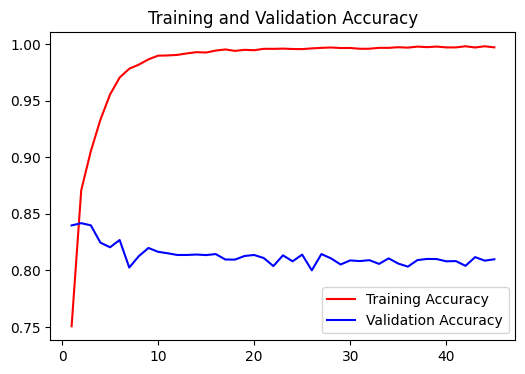

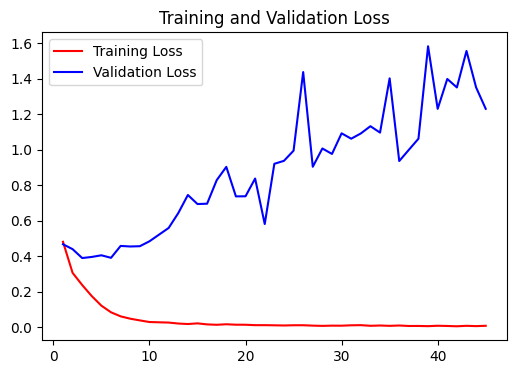

In [ ]:
accuracy = model_6.history['accuracy']
val_accuracy = model_6.history['val_accuracy']

loss = model_6.history["loss"]
val_loss = model_6.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="red", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="red", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("model6.keras")
test_loss, test_acc = test_model.evaluate(test_texts, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

157/157 [==============================] - 1s 5ms/step - loss: 0.3277 - accuracy: 0.8960
Test accuracy: 0.896


# **Model 7: Pre-Trained Embedding Model GloVe, Conv1D, Dropout**

**_Training Samples- 100, Validation Samples- 10000, Testing Samples- 5000_**

In [ ]:
import os
import shutil
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

!rm -r aclImdb/train/unsup

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

maxlen = 150  # cutting off reviews after 150 words
training_samples = 100  # training on 100 samples
validation_samples = 10000  # validating on 10000 samples
max_words = 10000  # considering the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

from google.colab import drive
drive.mount('/content/gdrive')

glove_dir = '/content/gdrive/MyDrive/Glove text'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  65.1M      0  0:00:01  0:00:01 --:--:-- 65.1M
Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Mounted at /content/gdrive
Found 400000 word vectors.


In [ ]:

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Compiling the Model
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
     

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,017,057
Trainable params: 17,057
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:

# Setting Callbacks
callbacks=callbacks = ModelCheckpoint(
            filepath= "pmodel1.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
premodel_1 =  model.fit(x_train, y_train, 
                     epochs=60, 
                     batch_size=32, 
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)
     

Epoch 1/60
4/4 [==============================] - 6s 575ms/step - loss: 0.6851 - accuracy: 0.6000 - val_loss: 0.6977 - val_accuracy: 0.4966
Epoch 2/60
4/4 [==============================] - 1s 364ms/step - loss: 0.6795 - accuracy: 0.5900 - val_loss: 0.6979 - val_accuracy: 0.4998
Epoch 3/60
4/4 [==============================] - 1s 365ms/step - loss: 0.6764 - accuracy: 0.6200 - val_loss: 0.6984 - val_accuracy: 0.5029
Epoch 4/60
4/4 [==============================] - 1s 357ms/step - loss: 0.6728 - accuracy: 0.6100 - val_loss: 0.6992 - val_accuracy: 0.5033
Epoch 5/60
4/4 [==============================] - 1s 360ms/step - loss: 0.6709 - accuracy: 0.5900 - val_loss: 0.6996 - val_accuracy: 0.5030
Epoch 6/60
4/4 [==============================] - 1s 357ms/step - loss: 0.6691 - accuracy: 0.6000 - val_loss: 0.6999 - val_accuracy: 0.5025
Epoch 7/60
4/4 [==============================] - 1s 435ms/step - loss: 0.6677 - accuracy: 0.5800 - val_loss: 0.7004 - val_accuracy: 0.5032
Epoch 8/60
4/4 [====

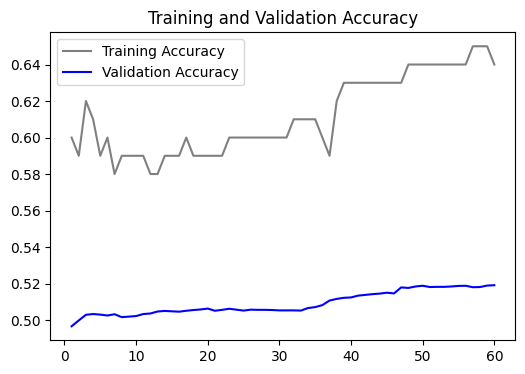

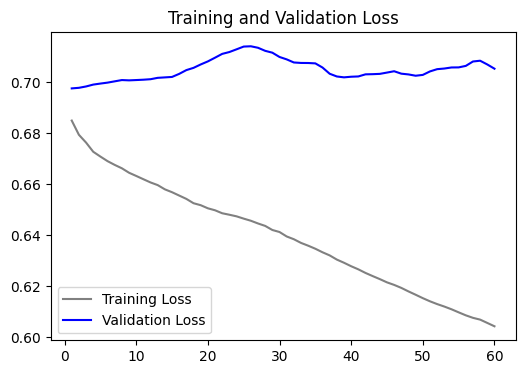

In [ ]:

accuracy = premodel_1.history['accuracy']
val_accuracy = premodel_1.history['val_accuracy']

loss = premodel_1.history["loss"]
val_loss = premodel_1.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)[:5000]
y_test = np.asarray(labels)[:5000]


In [ ]:

test_model = load_model('pmodel1.keras')
premodel1_Results = test_model.evaluate(x_test,y_test)

157/157 [==============================] - 1s 5ms/step - loss: 0.6711 - accuracy: 0.6376


# **Model 8: Model 7: Pre-Trained Embedding Model GloVe, Conv1D, Dropout**

**_Training Samples- 20000, Validation Samples- 10000, Test Samples- 5000_**

In [ ]:
import os
import shutil
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

!rm -r aclImdb/train/unsup

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

maxlen = 150  # cutting off reviews after 150 words
training_samples = 20000  # training on 20000 samples
validation_samples = 10000  # validating on 10000 samples
max_words = 10000  # considering the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

from google.colab import drive
drive.mount('/content/gdrive')

glove_dir = '/content/gdrive/MyDrive/Glove text'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  66.1M      0  0:00:01  0:00:01 --:--:-- 66.1M
Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 400000 word vectors.


In [ ]:

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Compiling the Model
model.compile(optimizer= 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 lstm_2 (LSTM)               (None, 32)                17024     
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,017,057
Trainable params: 17,057
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:

# Setting Callbacks
callbacks=callbacks = ModelCheckpoint(
            filepath= "pmodel2.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
premodel_2 =  model.fit(x_train, y_train, 
                     epochs=55, 
                     batch_size=32, 
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/55
625/625 [==============================] - 7s 9ms/step - loss: 0.5631 - accuracy: 0.7048 - val_loss: 0.4571 - val_accuracy: 0.7904
Epoch 2/55
625/625 [==============================] - 6s 9ms/step - loss: 0.4412 - accuracy: 0.7939 - val_loss: 0.4032 - val_accuracy: 0.8234
Epoch 3/55
625/625 [==============================] - 5s 8ms/step - loss: 0.3928 - accuracy: 0.8253 - val_loss: 0.4539 - val_accuracy: 0.8038
Epoch 4/55
625/625 [==============================] - 5s 8ms/step - loss: 0.3574 - accuracy: 0.8436 - val_loss: 0.3555 - val_accuracy: 0.8470
Epoch 5/55
625/625 [==============================] - 6s 10ms/step - loss: 0.3338 - accuracy: 0.8567 - val_loss: 0.3412 - val_accuracy: 0.8506
Epoch 6/55
625/625 [==============================] - 5s 7ms/step - loss: 0.3141 - accuracy: 0.8652 - val_loss: 0.3350 - val_accuracy: 0.8536
Epoch 7/55
625/625 [==============================] - 6s 10ms/step - loss: 0.2976 - accuracy: 0.8749 - val_loss: 0.3293 - val_accuracy: 0.8610
Epoc

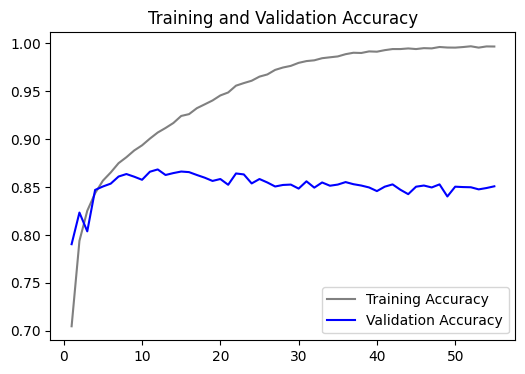

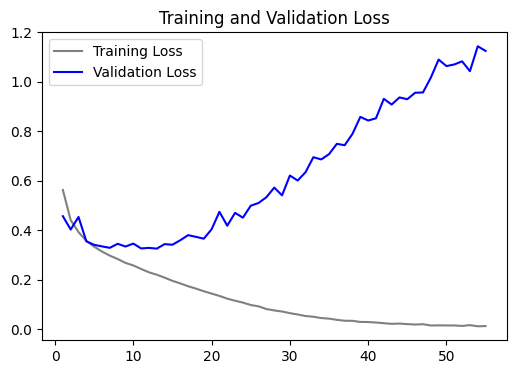

In [ ]:

accuracy = premodel_2.history['accuracy']
val_accuracy = premodel_2.history['val_accuracy']

loss = premodel_2.history["loss"]
val_loss = premodel_2.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)[:5000]
y_test = np.asarray(labels)[:5000]

In [ ]:

test_model = load_model('pmodel2.keras')
premodel2_Results = test_model.evaluate(x_test,y_test)

157/157 [==============================] - 1s 5ms/step - loss: 0.3024 - accuracy: 0.8700


# **Summary**



In [ ]:
import pandas as pd

data = {'Model': ['Model 2',
                      'Model 3','Model 4',
                      'Model 5','Model 6',
                      'Pre Model 1', 'Pre Model 2'],
        'Training Sample':['100','1000','900','4000','30000','100','20000'],
        'Validation Sample':['10000','10000','10000','10000','10000','10000','10000'],
        'Test Sample':['5000','5000','5000','5000','5000','5000','5000'],       
        'Loss Test': ['0.6929', '0.5401', '0.6265', '0.4667', '0.3277', '0.6711', '0.3024'],
        'Accuracy Test': ['0.5058', '0.7314', '0.6908', '0.7744', '0.8960', '0.6376', '0.8700']
        }

df = pd.DataFrame(data, columns = ['Model', 'Training Sample','Validation Sample','Test Sample', 'Loss Test', 'Accuracy Test'])

df

,Model,Training Sample,Validation Sample,Test Sample,Loss Test,Accuracy Test
0,Model 2,100,10000,5000,0.6929,0.5058
1,Model 3,1000,10000,5000,0.5401,0.7314
2,Model 4,900,10000,5000,0.6265,0.6908
3,Model 5,4000,10000,5000,0.4667,0.7744
4,Model 6,30000,10000,5000,0.3277,0.8960
5,Pre Model 1,100,10000,5000,0.6711,0.6376
6,Pre Model 2,20000,10000,5000,0.3024,0.8700
